In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

ratings_path = "../data/raw/ratings.csv"
movies_path = "../data/raw/movies.csv"

ratings = pd.read_csv(ratings_path)
movies = pd.read_csv(movies_path)

In [2]:
print("Ratings Sample: ")
ratings.head()

Ratings Sample: 


,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [3]:
print("Movies Sample: ")
movies.head()

Movies Sample: 


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
print(f"총 평점 수: {len(ratings)}")
print(f"고유 사용자 수: {ratings['userId'].nunique()}")
print(f"고유 영화 수: {ratings['movieId'].nunique()}")

총 평점 수: 100836
고유 사용자 수: 610
고유 영화 수: 9724


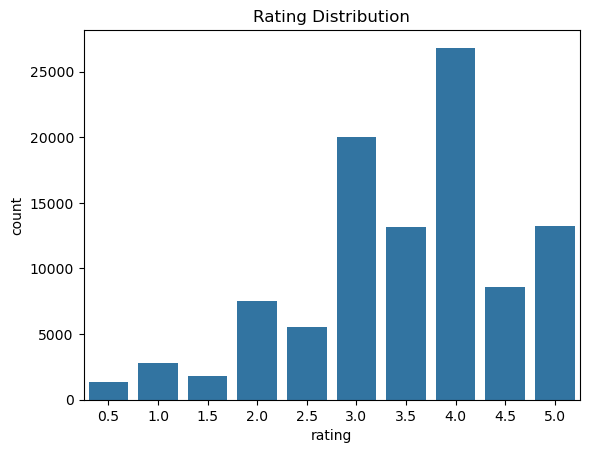

In [5]:
# 평점 분포 시각화
sns.countplot(x="rating", data=ratings)
plt.title("Rating Distribution")
plt.show()

# 이상치 제거(사용자 필터링)

유저 별 활동 수 Bar plot (Log): 


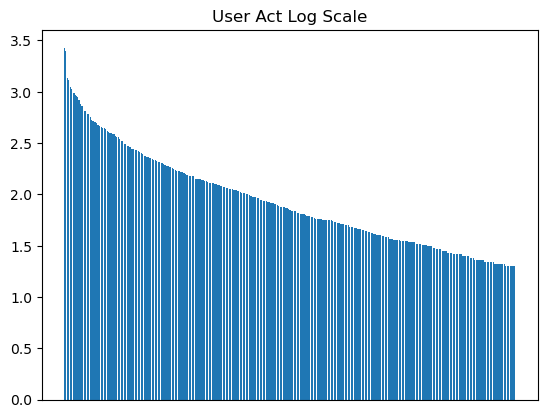

In [6]:
# 유저 별 활동 수 bar plot (log)
"""
급격하게 많아지는 "영화광"들을 제거하기로 한다.
"""
ratings_per_user = ratings["userId"].value_counts()
ratings_per_user.sort_values()

print("유저 별 활동 수 Bar plot (Log): ")
plt.bar(ratings_per_user.index.astype(str), np.log10(ratings_per_user.values))
plt.xticks([])
plt.title("User Act Log Scale")
plt.show()

유저 별 활동 수 Box Plot: 


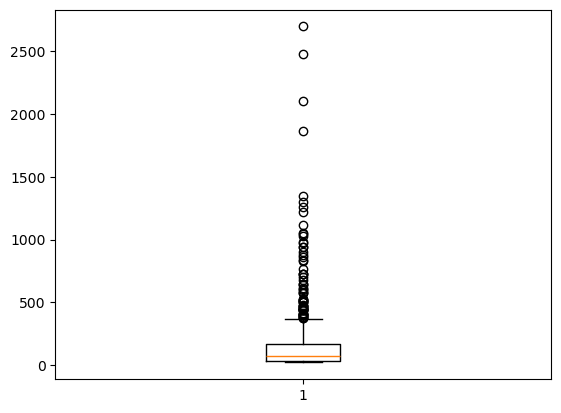

In [7]:
# 유저 별 활동 수 boxplot
"""
몇몇 유저가 너무 많은 평점을 주고 있음 => 이상한 데이터일 가능성 많음.
"""

print("유저 별 활동 수 Box Plot: ")
plt.boxplot(ratings_per_user)
plt.show()

In [8]:
# percentile 확인
print("유저 별 활동 수 Percentile: ")
ratings_per_user.describe()

유저 별 활동 수 Percentile: 


count     610.000000
mean      165.304918
std       269.480584
min        20.000000
25%        35.000000
50%        70.500000
75%       168.000000
max      2698.000000
Name: count, dtype: float64

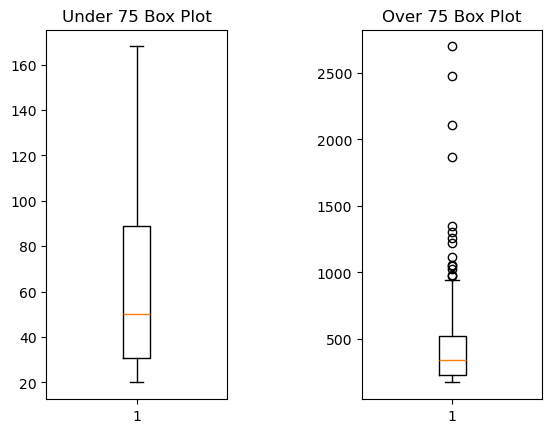

In [9]:
# 75% 이하, 이상 박스 플롯 확인
"""
분할 하니, 깔끔한 박스 플롯 확인 됨.
"""
under_75 = ratings_per_user[ratings_per_user <= ratings_per_user.quantile(0.75)]
over_75 = ratings_per_user[ratings_per_user > ratings_per_user.quantile(0.75)]

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.subplots_adjust(wspace=0.75)

ax1.boxplot(under_75)
ax1.set_title("Under 75 Box Plot")

ax2.boxplot(over_75)
ax2.set_title("Over 75 Box Plot")

plt.show()

In [10]:
over_over_75 = over_75[over_75 >= over_75.quantile(0.75)]
print(f"75% 이상 평점 수의 유저 중 75% 이상 유저의 수: {len(over_over_75)}")
over_over_75.describe()

75% 이상 평점 수의 유저 중 75% 이상 유저의 수: 38


count      38.000000
mean      986.973684
std       514.746093
min       520.000000
25%       646.500000
50%       849.000000
75%      1052.750000
max      2698.000000
Name: count, dtype: float64

In [11]:
# 너무 활동하지 않는 유저와 너무 많이 활동하는 유저 필터링
active_users = ratings_per_user[
    (ratings_per_user >= under_75.quantile(0.25))
    & (ratings_per_user <= over_over_75.quantile(0.75))
].index

In [12]:
print(f"Before Clean: {len(ratings_per_user)}, After Clean: {len(active_users)}")

Before Clean: 610, After Clean: 488


# 이상치 제거(영화 필터링)

In [13]:
movie_counts = ratings["movieId"].value_counts()

영화 별 평점 수 Bar plot (Log): 


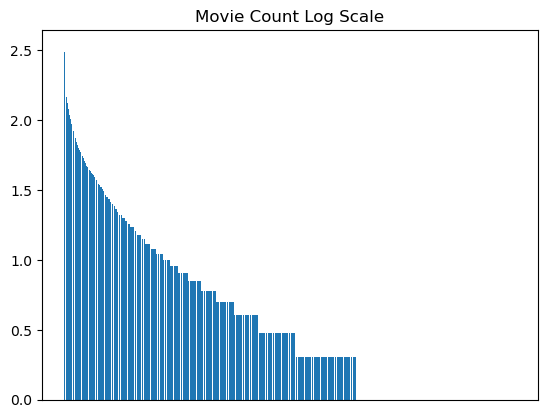

In [14]:
# 영화 별 평점점 수 bar plot (log)
ratings_per_movie = ratings["movieId"].value_counts()
ratings_per_movie.sort_values()

print("영화 별 평점 수 Bar plot (Log): ")
plt.bar(ratings_per_movie.index.astype(str), np.log10(ratings_per_movie.values))
plt.xticks([])
plt.title("Movie Count Log Scale")
plt.show()

75% 미만: 7455, 75%~81.25%: 1720, 75% 이상: 2269


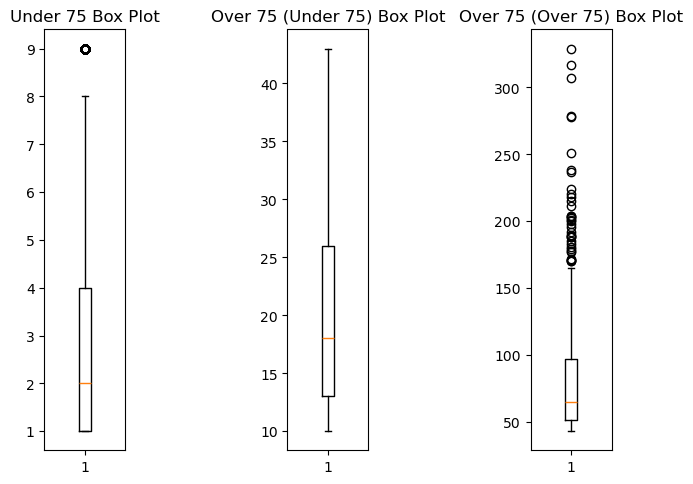

In [15]:
under_75 = ratings_per_movie[ratings_per_movie <= ratings_per_movie.quantile(0.75)]
over_75 = ratings_per_movie[ratings_per_movie > ratings_per_movie.quantile(0.75)]
over_under = over_75[over_75 <= over_75.quantile(0.75)]

print(
    f"75% 미만: {len(under_75)}, 75%~81.25%: {len(over_under)}, 75% 이상: {len(over_75)}"
)
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
fig.tight_layout()
fig.subplots_adjust(wspace=2.0)

ax1.boxplot(under_75)
ax1.set_title("Under 75 Box Plot")

ax2.boxplot(over_under)
ax2.set_title("Over 75 (Under 75) Box Plot")

ax3.boxplot(over_75[over_75 >= over_75.quantile(0.75)])
ax3.set_title("Over 75 (Over 75) Box Plot")

plt.show()

In [16]:
popular_movies = ratings_per_movie[
    (ratings_per_movie > 1) & (ratings_per_movie <= 300)
].index

In [17]:
print(f"Before Clean: {len(ratings_per_movie)}, After Clean: {len(popular_movies)}")

Before Clean: 9724, After Clean: 6275


# 필터링

In [18]:
ratings_clean = ratings[
    (ratings["userId"].isin(active_users)) & (ratings["movieId"].isin(popular_movies))
].copy()

In [19]:
print(f"Original ratings: {len(ratings)}, Cleaned ratings: {len(ratings_clean)}")

Original ratings: 100836, Cleaned ratings: 78834


In [20]:
processed_path = "../data/processed/ratings_clean.parquet"
ratings_clean.to_parquet(processed_path, index=False)

print(f"Cleaned data saved to {processed_path}")

Cleaned data saved to ../data/processed/ratings_clean.parquet
